In [ ]:
!pip install scikit-fuzzy --upgrade
#!pip install scikit-fuzzy==0.4.2

     |████████████████████████████████| 1.0MB 2.6MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894069 sha256=e266dc7bf6dff712bea794fd0ca10c1e3891ec3409d95ceadb15973ad817bcb0
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
base = pd.read_csv('credit_card_clients.csv', header = 1)
base.shape

(30000, 25)

In [ ]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

In [ ]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL_TOTAL
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,7704
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,17077
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,101653
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,231334
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,109339


In [ ]:
X = base.iloc[:,[1,25]].values

In [ ]:
X

array([[ 20000,   7704],
       [120000,  17077],
       [ 90000, 101653],
       ...,
       [ 30000,  70496],
       [ 80000, 266611],
       [ 50000, 230874]], dtype=int64)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [ ]:
X.shape

(30000, 2)

In [ ]:
X.T.shape

(2, 30000)

In [ ]:
r = skfuzzy.cmeans(data = X.T, c = 3, m = 2, error=0.005, maxiter=1000, init=None)

In [ ]:
r

(array([[ 0.74992918,  2.01652426],
        [-0.7389436 , -0.30171593],
        [ 0.97506068, -0.420561  ]]),
 array([[0.02592027, 0.02732397, 0.00499218, ..., 0.01491453, 0.01405793,
         0.00905984],
        [0.91181245, 0.84858117, 0.97912815, ..., 0.9501068 , 0.95612743,
         0.97292864],
        [0.06226728, 0.12409486, 0.01587967, ..., 0.03497867, 0.02981464,
         0.01801153]]),
 array([[0.44422121, 0.07213745, 0.37576635, ..., 0.37174057, 0.62107302,
         0.01467878],
        [0.31369469, 0.42990271, 0.59124904, ..., 0.27013317, 0.05059285,
         0.91113998],
        [0.2420841 , 0.49795984, 0.03298461, ..., 0.35812626, 0.32833413,
         0.07418124]]),
 array([[3.29976749, 2.90537041, 2.80443554, ..., 3.12013097, 2.47575147,
         2.68916908],
        [0.5563529 , 0.52134682, 0.20024931, ..., 0.39092321, 0.30019943,
         0.25950026],
        [2.12898779, 1.363316  , 1.57242563, ..., 2.03739868, 1.70001586,
         1.90722985]]),
 array([25842.194018

In [ ]:
previsoes_porcentagem = r[1]

In [ ]:
previsoes_porcentagem.shape

(3, 30000)

In [ ]:
previsoes_porcentagem

array([[0.02592027, 0.02732397, 0.00499218, ..., 0.01491453, 0.01405793,
        0.00905984],
       [0.91181245, 0.84858117, 0.97912815, ..., 0.9501068 , 0.95612743,
        0.97292864],
       [0.06226728, 0.12409486, 0.01587967, ..., 0.03497867, 0.02981464,
        0.01801153]])

In [ ]:
previsoes_porcentagem[0][0]

0.0259202716673407

In [ ]:
previsoes_porcentagem[1][0]

0.9118124499071045

In [ ]:
previsoes_porcentagem[2][0]

0.062267278425554844

In [ ]:
previsoes_porcentagem[0][0] + previsoes_porcentagem[1][0] + previsoes_porcentagem[2][0]

1.0

In [ ]:
previsoes = previsoes_porcentagem.argmax(axis=0)

In [ ]:
previsoes

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
previsoes[5000]

1

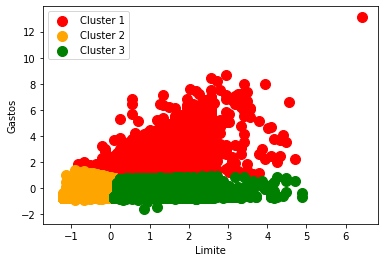

In [ ]:
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend();